# <center>OASBUD Data Processing `V0.1`</center>


<div style="text-align: right">Name: Boyang Wang</div> 
<div style="text-align: right"> Email: bwang40@hawk.iit.edu </div>
<div style="text-align: right">Date: Sept 27 2019</div>

## Information:

This is to parse the OASBUD original matlab data with python.

Rev 0.1 Re-implement MATLAB signal plot

In [7]:
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from tqdm import tnrange, tqdm_notebook
from scipy.io import loadmat
from scipy import signal,ndimage
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import os
import random
import time
import timeit

In [126]:
# load the OASBUD raw data from google drive
# The data is also available on website: https://zenodo.org/record/545928#.XY0eSkZKiic
origindata = loadmat("C:/Users/wangb/Documents/MATLAB/ultrasonic_image_nn/OASBUD_for_Python.mat")
subject = ["id", "rf1", "rf2", "roi1", "roi2", "birads", "class"]

tmpnames = origindata["id"]
tmprf1 = origindata["rf1"]
tmprf2 = origindata["rf2"]
tmproi1 = origindata["roi1"]
tmproi2 = origindata["roi2"]
tmptypes = origindata["class"]
tmpbirads = origindata["birads"]

names = []
rf = []
rfenvelope = []
roi = []
types = []
birads = []
timeaxis = []
roiedge = []

for index in range(0,100):
    names.append(tmpnames[0,index][0]+'_0')
    names.append(tmpnames[0,index][0]+'_1')
    
    rf.append(tmprf1[0,index])
    rf.append(tmprf2[0,index])
    
    roi.append(tmproi1[0,index])
    roi.append(tmproi2[0,index])
    
    types.append(tmptypes[0,index][0][0])
    types.append(tmptypes[0,index][0][0])
    
    birads.append(tmpbirads[0,index][0])
    birads.append(tmpbirads[0,index][0])
    
del tmprf1,tmprf2,tmproi1,tmproi2,tmptypes,tmpbirads

#Generating Time axis for the data
Fs = 40e6
T = 1/Fs

for index in range(0,len(rf)):
    N = rf[index].shape[0]
    t = T * N
    timeaxisbuf = np.linspace(0,t,N)*1e6 #time axis in us
    timeaxis.append(timeaxisbuf)

# Find roi edge of the region of interest
for items in roi:
    edgebuf = ndimage.sobel(items,output="bool",cval=100)
    roiedge.append(edgebuf)

# Find rf envelope
for items in rf:
    envelope = 20 * np.log10(abs(signal.hilbert(items,axis=0)))
    rfenvelope.append(envelope)
    

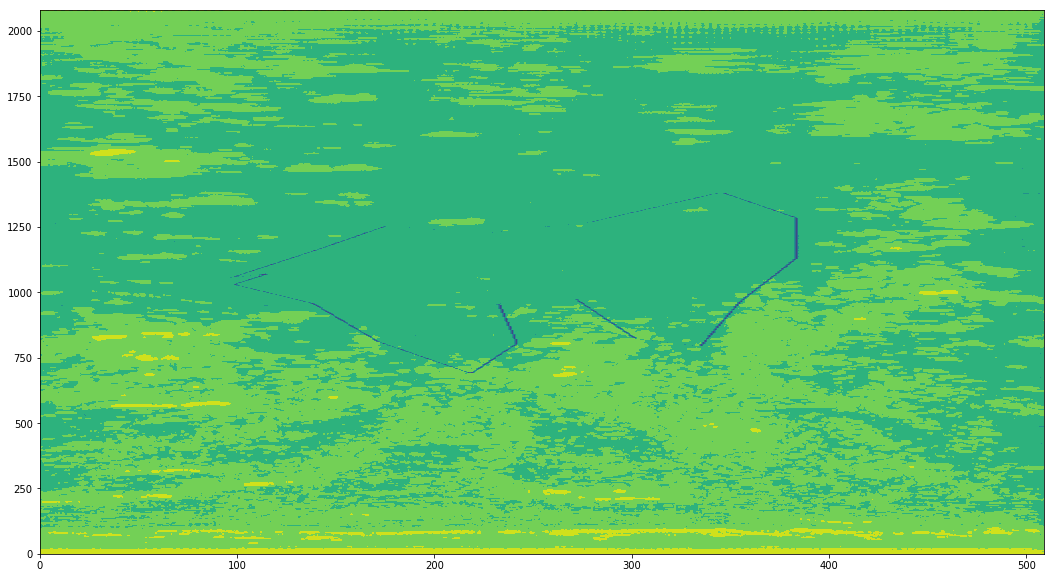

In [165]:
randindex = random.randint(0,len(rf))

testtime = timeaxis[randindex]
testrf = rf[randindex]
testroi = roi[randindex]
testroiedge = roiedge[randindex]
testbirads = birads[randindex]
testclass = types[randindex]
testname = names[randindex]
testrfenvelope = rfenvelope[randindex]

#plot the contour 
_ = plt.figure(figsize = (18,10))
testplot = testrfenvelope * np.invert(testroiedge)
_ = plt.contourf(testplot,max=np.amax(testrfenvelope),min=np.amin(testrfenvelope))

In [166]:
# _ = plt.figure(figsize = (15,15))
# _ = plt.subplot(121)
# _ = plt.contourf(testrf1)
# _ = plt.subplot(122)
# _ = plt.contourf(testroi1)

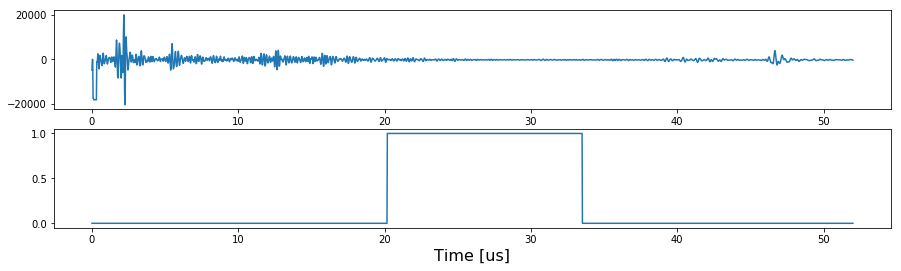

In [167]:
index2 = 320
_ = plt.figure(figsize = (15,4))
_ = plt.subplot(211)
_ = plt.plot(testtime,testrf[:,index2])
_ = plt.xlabel('Time [us]', fontsize=16)
_ = plt.subplot(212)
_ = plt.plot(testtime,testroi[:,index2])
_ = plt.xlabel('Time [us]', fontsize=16)